In [1]:
import numpy as np
from tslearn.preprocessing import *
from tslearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-darkgrid')
%matplotlib inline

In [2]:
sl = np.loadtxt('cds_2_only_simu.txt')
rl = np.loadtxt('cds_2_real.txt')[850:1800]
sl = np.array([i for i in sl for j in range(10)])
sl = TimeSeriesScalerMinMax(min=0, max=10).fit_transform(sl)[0].T[0]
rl = TimeSeriesScalerMinMax(min=0, max=10).fit_transform(rl)[0].T[0]

In [15]:
# prepare input file for dtw package of R

sl = np.loadtxt('cds_2_only_simu.txt')
rl = np.loadtxt('cds_2_real.txt')[:-10]
sl = np.array([i for i in sl for j in range(10)])
#sl = TimeSeriesScalerMinMax(min=0, max=10).fit_transform(sl)[0].T[0]
#rl = TimeSeriesScalerMinMax(min=0, max=10).fit_transform(rl)[0].T[0]
np.savetxt('norm_sl.txt', sl)
np.savetxt('norm_rl.txt', rl)

In [3]:
obe = pd.read_table('cds2_obe.txt')

sorted([(i, a.count(i)) for i in set(a)], key=lambda x: x[0])

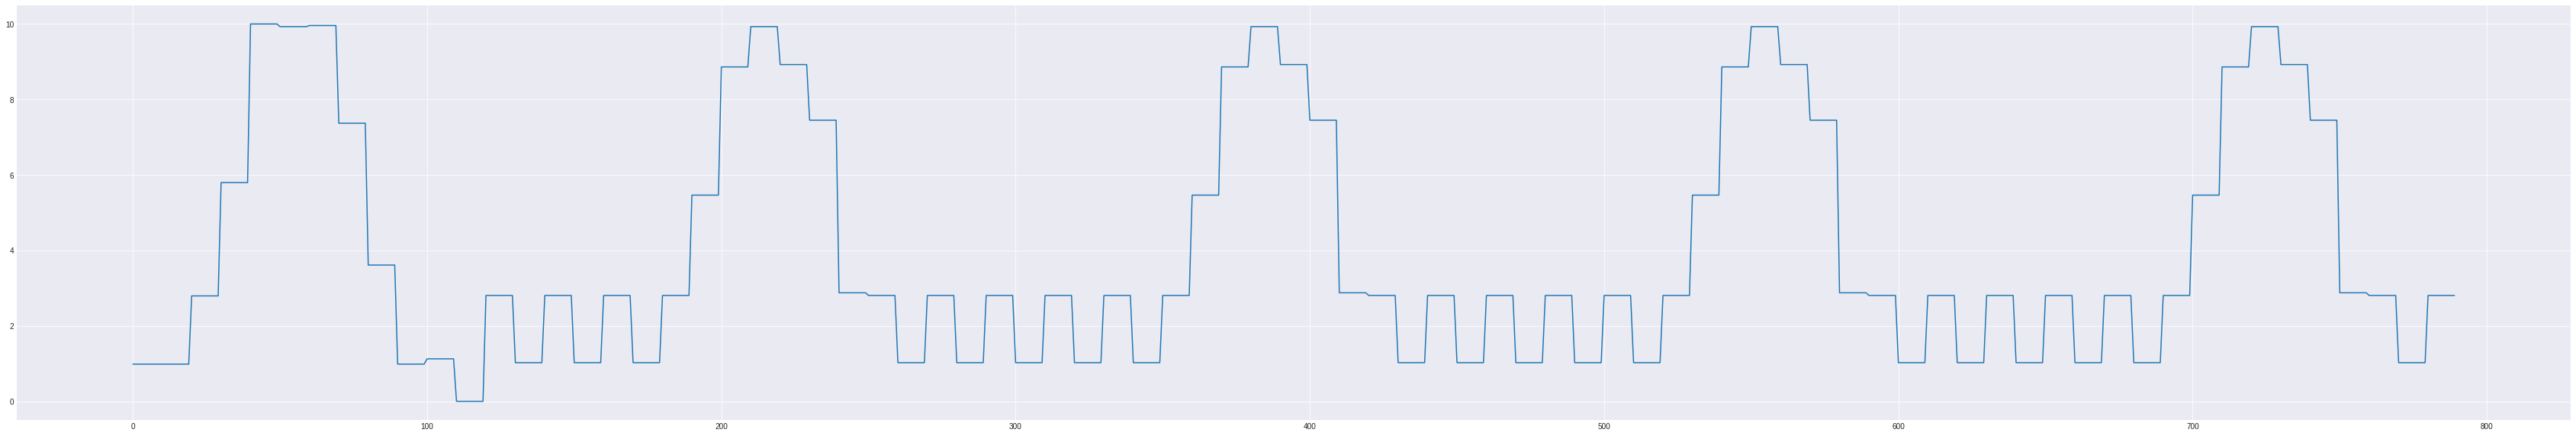

In [8]:
plt.figure(figsize=(60, 10))
plt.plot(sl);

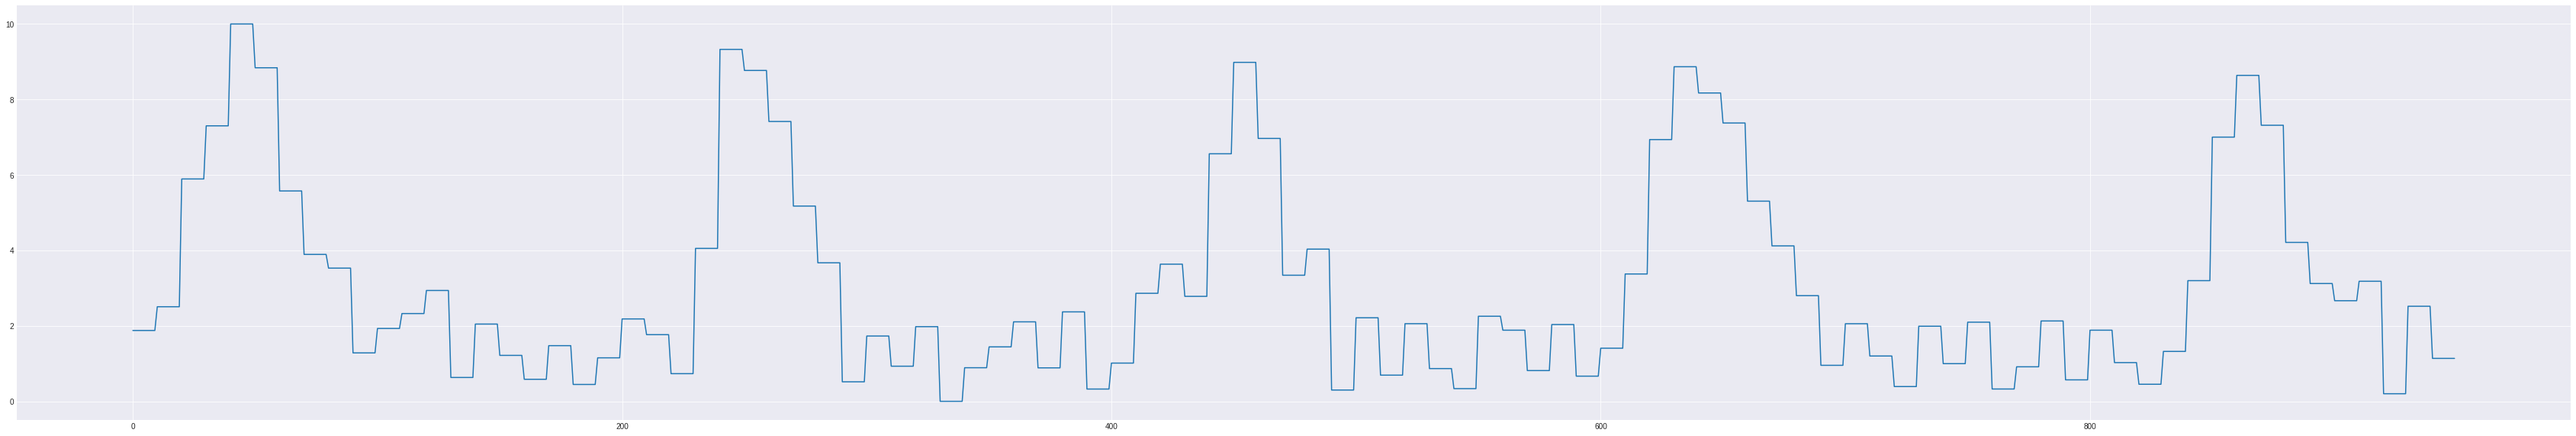

In [9]:
plt.figure(figsize=(60, 10))
plt.plot(rl);

In [13]:
sb = metrics.dtw_subsequence_path(sl,rl[800:1800])

In [15]:
sb[0][0]

(0, 349)

In [16]:
sb[0][-1]

(789, 640)

In [19]:
sb[1]

213.21786334335363

In [43]:
#parameters
s_1 = sl; s_2 = rl
n = int(len(sl)/10)
sn = 10
mx = 20
lg = len(sl) - 1


##processing

path, sim = metrics.dtw_path(s_1, s_2)

matrix_path = numpy.zeros((len(s_1), len(s_2)), dtype=numpy.int)
for i, j in path:
    matrix_path[i, j] = 1

IndexError: index 799 is out of bounds for axis 0 with size 790

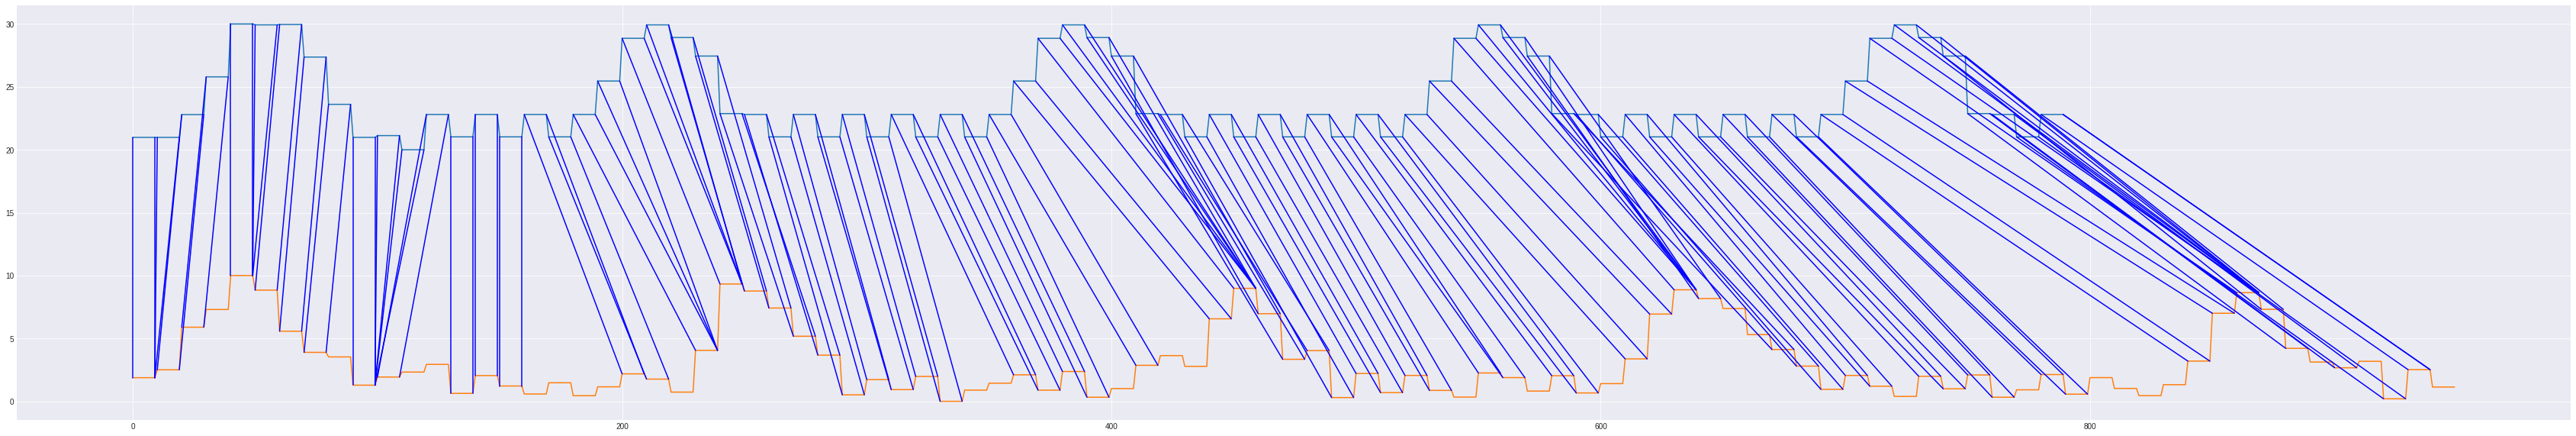

In [22]:
#block 1
plt.figure(figsize=(60, 10))
st = s_1 + mx
plt.plot(st)
plt.plot(s_2)
rag = np.linspace(0,n*sn,n+1)
pos = []
for i in rag:
    if i + 9 < lg:
        pos = pos + [i, i + 9]
    else:
        pos = pos + [i, lg]
for i in pos:
    if i != len(matrix_path):
        #print(i, matrix_path[int(i)].argmax())
        idx = int(matrix_path[int(i)].argmax())
        plt.plot([i, idx], [st[int(i)],s_2[idx]], 'b')
    else:
        i = i -1
        idx = int(matrix_path[int(i)].argmax())
        plt.plot([i, idx], [st[int(i)],s_2[idx]], 'b')

analysed deletions are [1, 5, 10, 11, 19, 21, 38, 39, 55, 56, 72, 73], totally 12
deletion rate is 0.1518987341772152


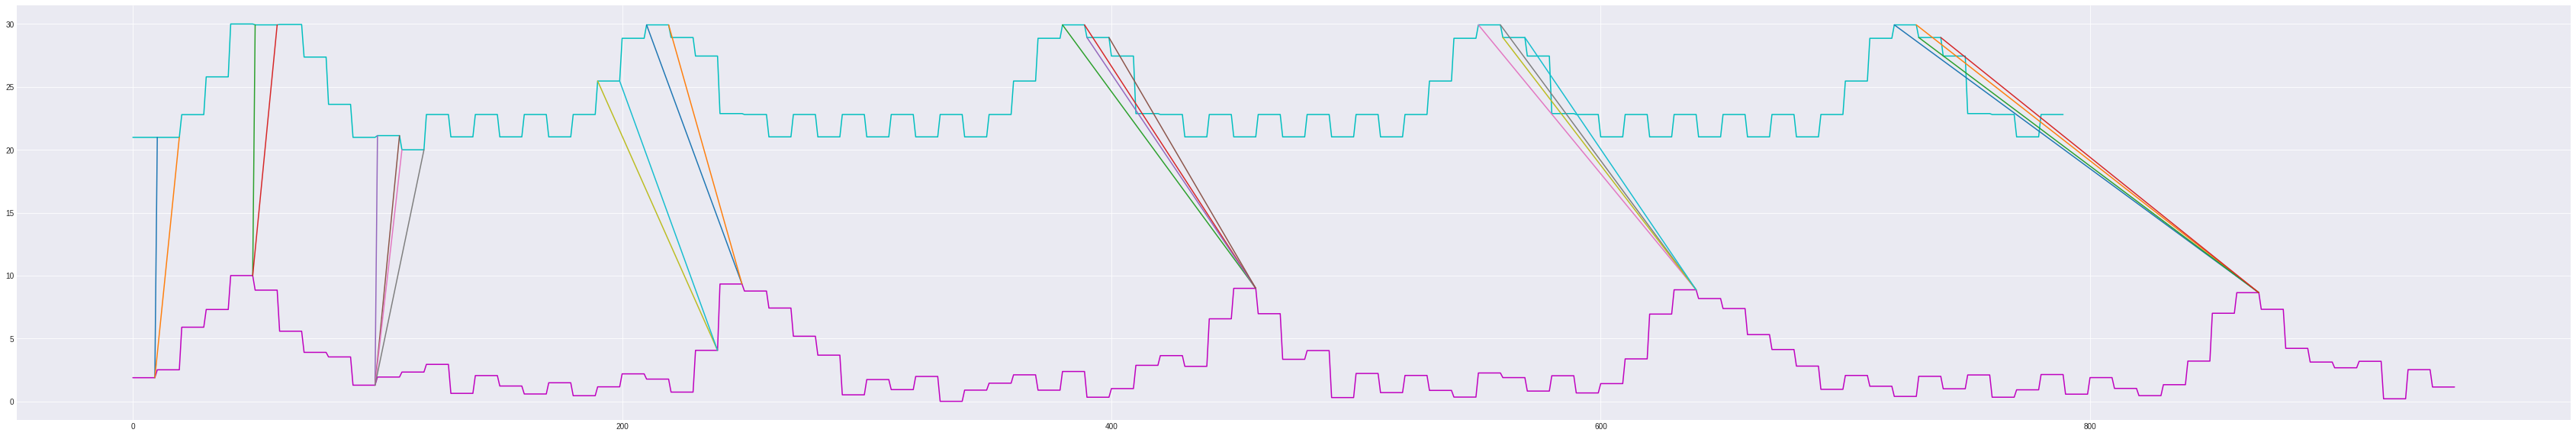

In [15]:
#block 3
deletion = []
for idx, i in enumerate(np.linspace(0,n*sn,n+1)[:n]):
    i = int(i)
    if abs(matrix_path[i+sn-1].argmax() - matrix_path[i].argmax()) < 3:
        deletion = deletion + [idx]
        
plt.figure(figsize=(60, 10))
st = s_1 + mx
plt.plot(st, 'c')
plt.plot(s_2, 'm')
pos1 = []
for i in deletion:
    if i*sn + 9 > sn*n-1:
        pos1 = pos1 + [i*sn, sn*n-1]
    else:
        pos1 = pos1 + [i*10, i*10 + 9]
for i in pos1:
    if i < len(matrix_path):
        #print(i, matrix_path[int(i)].argmax())
        idx = int(matrix_path[int(i)].argmax())
        plt.plot([i, idx], [st[int(i)],s_2[idx]])
    else:
        i = i - 1
        idx = int(matrix_path[int(i)].argmax())
        plt.plot([i, idx], [st[int(i)],s_2[idx]])
        
#print('real deletions are     %s'%(s[3]))
print('analysed deletions are %s, totally %s'%(deletion, len(deletion)))
print('deletion rate is %s'%(len(deletion)/n))
#inter = set(s[3]).intersection(set(deletion))
#print('TP are                 %s'%(sorted(list(inter))))

analysed insertions are [3, 4, 8, 11, 12, 16, 17, 18, 19, 22, 34, 35, 40, 42, 43, 54, 57, 60, 65, 66, 72, 77], totally 22
inertions in ref positions are [4, 5, 9, 13, 13, 16, 16, 16, 16, 18, 31, 31, 35, 36, 36, 48, 50, 52, 58, 58, 63, 67]
insertion rate is 0.27848101265822783


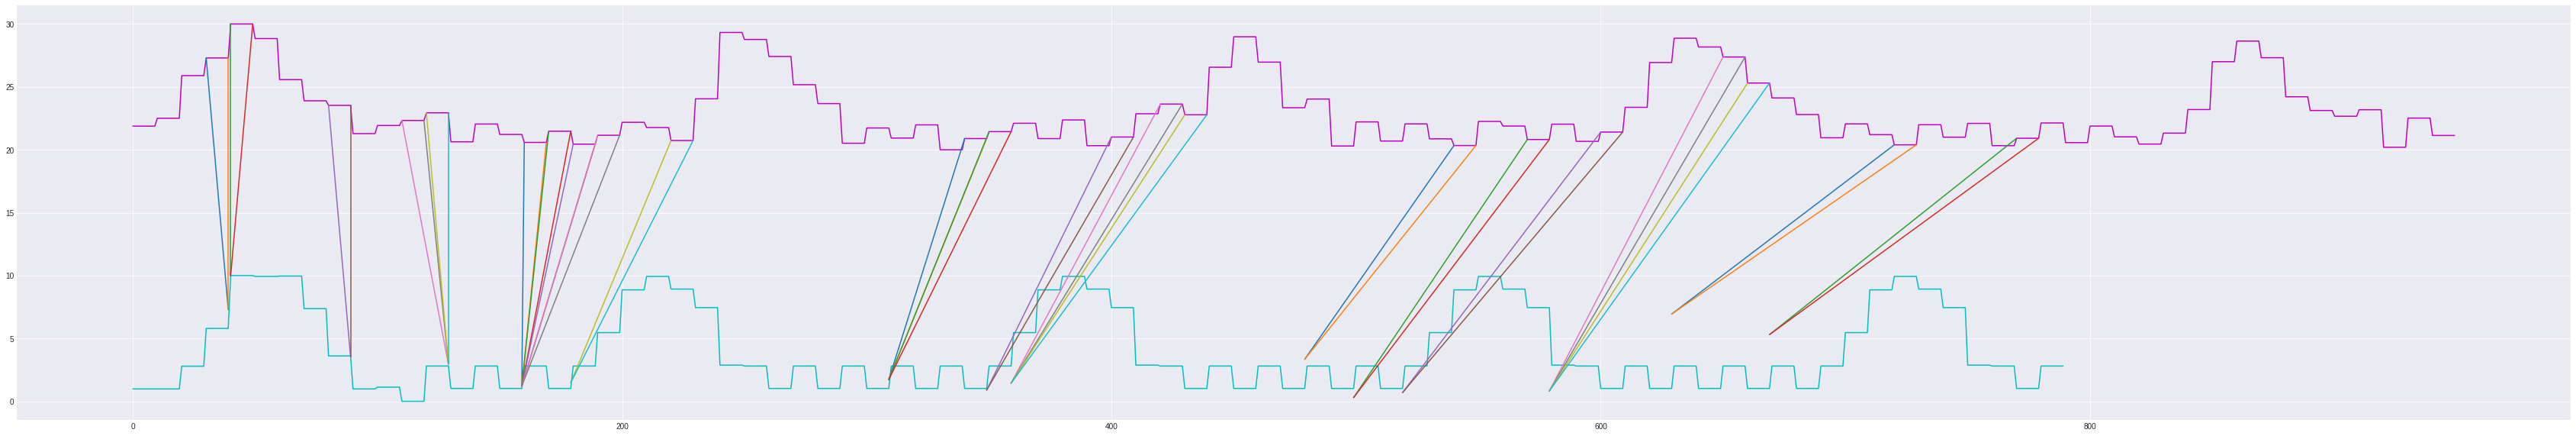

In [36]:
#block 3
insertion = []
insertion_ref = []
matrix_path_t = matrix_path.T
lg = len(rl) - 1
for idx, i in enumerate(np.linspace(0,n*sn,n+1)[:n]):
    i = int(i)
    if abs(matrix_path_t[i+sn-1].argmax() - matrix_path_t[i].argmax()) < 3:
        insertion = insertion + [idx]
        insertion_ref = insertion_ref + [matrix_path_t[i+sn-1].argmax()//10 + 1]
        
plt.figure(figsize=(60, 10))
st = s_2 + mx
plt.plot(st, 'm')
plt.plot(s_1, 'c')
pos1 = []
for i in insertion:
    if i*sn + 9 > lg:
        pos1 = pos1 + [lg, lg + 1]
    else:
        pos1 = pos1 + [i*10, i*10 + 9]
for i in pos1:
    if i < len(matrix_path_t):
        #print(i, matrix_path_t[int(i)].argmax())
        idx = int(matrix_path_t[int(i)].argmax())
        plt.plot([i, idx], [st[int(i)],s_2[idx]])
    else:
        i = i - 1
        idx = int(matrix_path_t[int(i)].argmax())
        plt.plot([i, idx], [st[int(i)],s_2[idx +sn-1]])
        
#print('real insertions are     %s'%(s[3]))
print('analysed insertions are %s, totally %s'%(insertion, len(insertion)))
print('inertions in ref positions are %s' % (insertion_ref))
print('insertion rate is %s'%(len(insertion)/n))
#inter = set(s[3]).intersection(set(insertion))
#print('TP are                 %s'%(sorted(list(inter))))

analysed deletions are [1, 5, 10, 11, 19, 21, 38, 39, 55, 56, 72, 73], totally 12
deletion rate is 0.1518987341772152
analysed insertions are [3, 4, 8, 11, 12, 16, 17, 18, 19, 22, 34, 35, 40, 42, 43, 54, 57, 60, 65, 66, 72, 77], totally 22
inertions in ref positions are [4, 5, 9, 13, 13, 16, 16, 16, 16, 18, 31, 31, 35, 36, 36, 48, 50, 52, 58, 58, 63, 67]
insertion rate is 0.27848101265822783


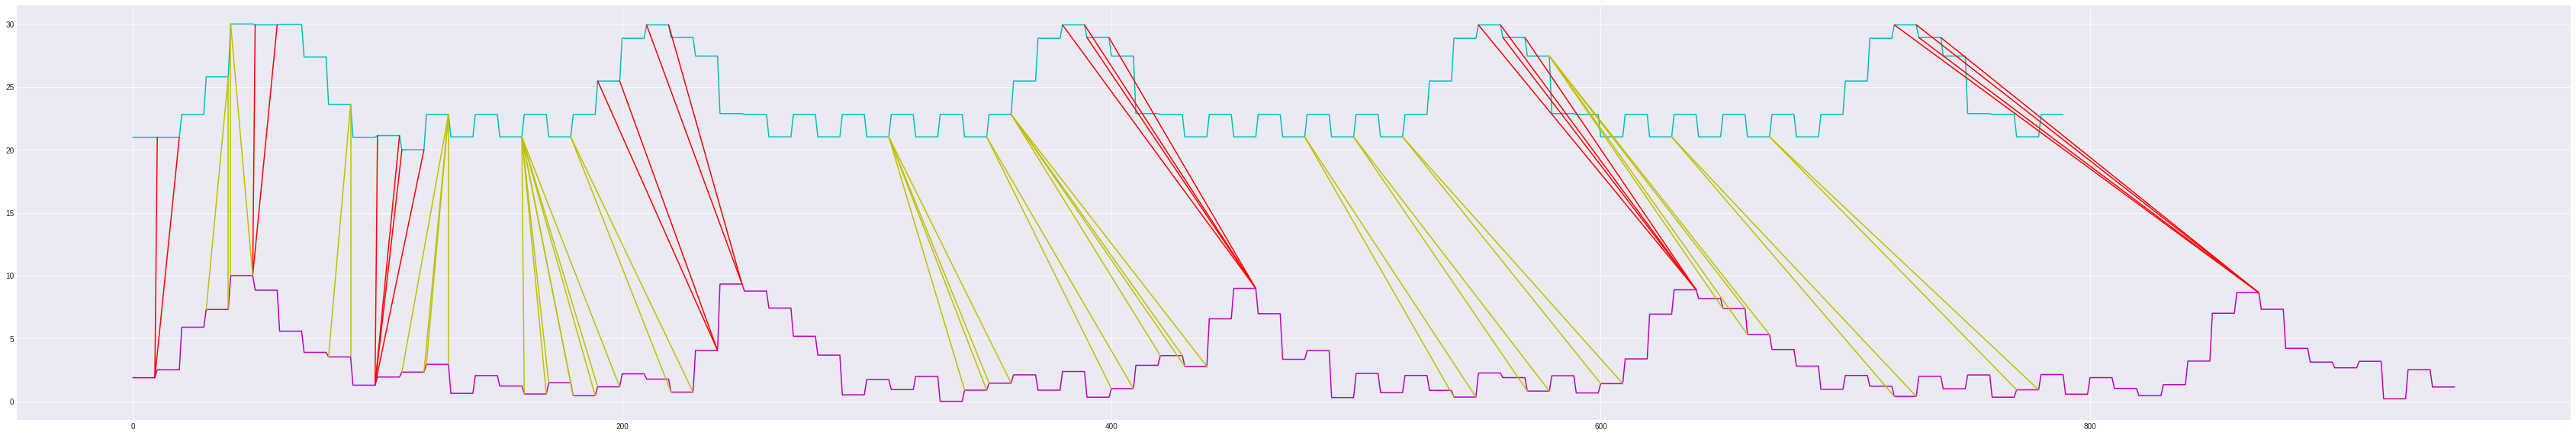

In [34]:
#block test
deletion = []
for idx, i in enumerate(np.linspace(0,n*sn,n+1)[:n]):
    i = int(i)
    if abs(matrix_path[i+sn-1].argmax() - matrix_path[i].argmax()) < 3:
        deletion = deletion + [idx]
        
plt.figure(figsize=(60, 10))
st = s_1 + mx
plt.plot(st, 'c')
plt.plot(s_2, 'm')
pos1 = []
for i in deletion:
    if i*sn + 9 > sn*n-1:
        pos1 = pos1 + [i*sn, sn*n-1]
    else:
        pos1 = pos1 + [i*10, i*10 + 9]
for i in pos1:
    if i < len(matrix_path):
        #print(i, matrix_path[int(i)].argmax())
        idx = int(matrix_path[int(i)].argmax())
        plt.plot([i, idx], [st[int(i)],s_2[idx]], 'r')
    else:
        i = i - 1
        idx = int(matrix_path[int(i)].argmax())
        plt.plot([i, idx], [st[int(i)],s_2[idx]], 'r')
        
#print('real deletions are     %s'%(s[3]))
print('analysed deletions are %s, totally %s'%(deletion, len(deletion)))
print('deletion rate is %s'%(len(deletion)/n))
#inter = set(s[3]).intersection(set(deletion))
#print('TP are                 %s'%(sorted(list(inter))))


insertion = []
insertion_ref = []
matrix_path_t = matrix_path.T
lg = len(rl) - 1
for idx, i in enumerate(np.linspace(0,n*sn,n+1)[:n]):
    i = int(i)
    if abs(matrix_path_t[i+sn-1].argmax() - matrix_path_t[i].argmax()) < 3:
        insertion = insertion + [idx]
        insertion_ref = insertion_ref + [matrix_path_t[i+sn-1].argmax()//10 + 1]
        
#plt.figure(figsize=(60, 10))
#st = s_1 + mx
#plt.plot(st, 'm')
#plt.plot(s_2, 'c')
pos1 = []
for i in insertion:
    if i*sn + 9 > lg:
        pos1 = pos1 + [lg, lg + 1]
    else:
        pos1 = pos1 + [i*10, i*10 + 9]
for i in pos1:
    if i < len(matrix_path_t):
        #print(i, matrix_path_t[int(i)].argmax())
        idx = int(matrix_path_t[int(i)].argmax())
        plt.plot([i, idx], [s_2[i], st[int(idx)]], 'y')
    else:
        i = i - 1
        idx = int(matrix_path_t[int(i)].argmax())
        plt.plot([i, idx], [s_2[i], st[int(idx)]], 'y')
        
#print('real insertions are     %s'%(s[3]))
print('analysed insertions are %s, totally %s'%(insertion, len(insertion)))
print('inertions in ref positions are %s' % (insertion_ref))
print('insertion rate is %s'%(len(insertion)/n))
#inter = set(s[3]).intersection(set(insertion))
#print('TP are                 %s'%(sorted(list(inter))))

analysed deletions are [1, 5, 10, 11, 19, 21, 38, 39, 55, 56, 72, 73], totally 12
deletion rate is 0.1518987341772152
analysed insertions are [3, 4, 8, 11, 12, 16, 17, 18, 19, 22, 34, 35, 40, 42, 43, 54, 57, 60, 65, 66, 72, 77, 80, 81, 82, 83, 89, 91, 94], totally 29
inertions in ref positions are [4, 5, 9, 13, 13, 16, 16, 16, 16, 18, 31, 31, 35, 36, 36, 48, 50, 52, 58, 58, 63, 67, 69, 69, 69, 69, 76, 77, 79]
insertion rate is 0.3670886075949367


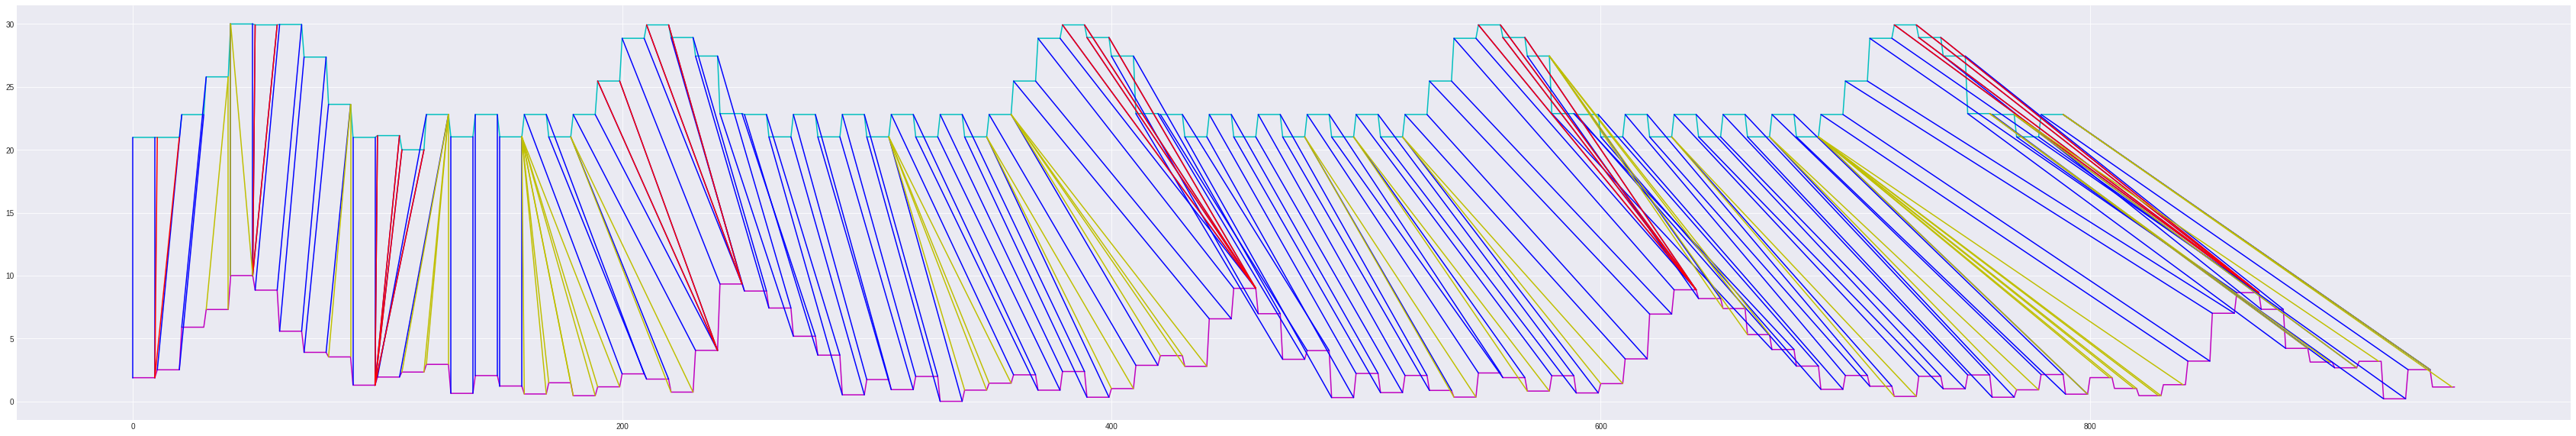

In [49]:
#block test

s_1 = sl; s_2 = rl
n = int(len(sl)/10)
sn = 10
mx = 20
lg = len(sl) - 1


##processing

path, sim = metrics.dtw_path(s_1, s_2)

matrix_path = numpy.zeros((len(s_1), len(s_2)), dtype=numpy.int)
for i, j in path:
    matrix_path[i, j] = 1
    
    
deletion = []
for idx, i in enumerate(np.linspace(0,n*sn,n+1)[:n]):
    i = int(i)
    if abs(matrix_path[i+sn-1].argmax() - matrix_path[i].argmax()) < 3:
        deletion = deletion + [idx]
        

plt.figure(figsize=(60, 10))
st = s_1 + mx
plt.plot(st, 'c')
plt.plot(s_2, 'm')

rag = np.linspace(0,n*sn,n+1)
pos = []
for i in rag:
    if i + 9 < lg:
        pos = pos + [i, i + 9]
    else:
        pos = pos + [i, lg]
for i in pos:
    if i not in deletion:
        if i != len(matrix_path):
            #print(i, matrix_path[int(i)].argmax())
            idx = int(matrix_path[int(i)].argmax())
            plt.plot([i, idx], [st[int(i)],s_2[idx]], 'b')
        else:
            i = i -1
            idx = int(matrix_path[int(i)].argmax())
            plt.plot([i, idx], [st[int(i)],s_2[idx]], 'b')
        


        

pos1 = []
for i in deletion:
    if i*sn + 9 > sn*n-1:
        pos1 = pos1 + [i*sn, sn*n-1]
    else:
        pos1 = pos1 + [i*10, i*10 + 9]
for i in pos1:
    if i < len(matrix_path):
        #print(i, matrix_path[int(i)].argmax())
        idx = int(matrix_path[int(i)].argmax())
        plt.plot([i, idx], [st[int(i)],s_2[idx]], 'r')
    else:
        i = i - 1
        idx = int(matrix_path[int(i)].argmax())
        plt.plot([i, idx], [st[int(i)],s_2[idx]], 'r')
        
#print('real deletions are     %s'%(s[3]))
print('analysed deletions are %s, totally %s'%(deletion, len(deletion)))
print('deletion rate is %s'%(len(deletion)/n))
#inter = set(s[3]).intersection(set(deletion))
#print('TP are                 %s'%(sorted(list(inter))))


insertion = []
insertion_ref = []
matrix_path_t = matrix_path.T
lg = len(rl) - 1
rln = len(rl)//10
for idx, i in enumerate(np.linspace(0,rln*sn,rln+1)[:rln]):
    i = int(i)
    if abs(matrix_path_t[i+sn-1].argmax() - matrix_path_t[i].argmax()) < 3:
        insertion = insertion + [idx]
        insertion_ref = insertion_ref + [matrix_path_t[i+sn-1].argmax()//10 + 1]
        
#plt.figure(figsize=(60, 10))
#st = s_1 + mx
#plt.plot(st, 'm')
#plt.plot(s_2, 'c')
pos1 = []
for i in insertion:
    if i*sn + 9 > lg:
        pos1 = pos1 + [lg, lg + 1]
    else:
        pos1 = pos1 + [i*10, i*10 + 9]
for i in pos1:
    if i < len(matrix_path):
        #print(i, matrix_path_t[int(i)].argmax())
        idx = int(matrix_path_t[int(i)].argmax())
        plt.plot([i, idx], [s_2[i], st[int(idx)]], 'y')
    else:
        i = i - 1
        idx = int(matrix_path_t[int(i)].argmax())
        plt.plot([i, idx], [s_2[i], st[int(idx)]], 'y')
        
#print('real insertions are     %s'%(s[3]))
print('analysed insertions are %s, totally %s'%(insertion, len(insertion)))
print('inertions in ref positions are %s' % (insertion_ref))
print('insertion rate is %s'%(len(insertion)/n))
#inter = set(s[3]).intersection(set(insertion))
#print('TP are                 %s'%(sorted(list(inter))))

In [50]:
rln

95